In [3]:
import numpy as np    #Biblioteca matemática
import pandas as pd   #Biblioteca para manipulação de dados
import matplotlib.pyplot as plt #Biblioteca gráfica

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [66]:
#Busca dos dados (DUAS UNAS DATASET)
base_path = './dataset/duas_unas/days/'
path = f'{base_path}grouped_3_days.csv'
dados = pd.read_csv(path,sep=',', encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)

In [ ]:
#Plotar gráfico para visualização dos dados
dados['kWh fornecido'].astype(float)
dados.plot(figsize=(30,6),legend=True)  #Gráfico PJME_MW ao longo dos 16 anos

plt.title('Perfil de Consumo de Energia EEAB DUAS UNAS - 2022')

plt.show()

In [ ]:
# Função para agrupar dados por dias e horas
def group_data(df, days, hours):
    # Resample para dados diários
    daily_resample = df.resample(f'{days}D').sum()  # Pode mudar para sum() ou outra função de agregação
    # Para cada hora, podemos recortar um subset da granularidade original
    hourly_resample = daily_resample.resample(f'{hours}H').sum()
    return hourly_resample

# Iterar sobre as combinações de agrupamento
for day in dataset_config['group_by']['days']:
    for hour in dataset_config['group_by']['hours']:
        # Agrupar os dados
        grouped_df = group_data(df, day, hour)
        
        # Usar o diretório 'dataset' existente e criar a pasta 'duas_unas' dentro dele
        output_dir = os.path.join(filename_pasta_duas_unas, 'duas_unas')
        os.makedirs(output_dir, exist_ok=True)  # Cria 'duas_unas' dentro de 'dataset', se não existir
        
        # Salvar arquivo agrupado
        output_file = os.path.join(output_dir, f'grouped_days_{day}_hours_{hour}.csv')
        grouped_df.to_csv(output_file)
        
        print(f'Salvo: {output_file}')

In [4]:
import numpy as np

def calcular_accuracy_series_temporais(y_real, y_previsto, tolerancia=0.05):
    """
    Calcula a acurácia para previsões de séries temporais.
    
    :param y_real: array de valores reais.
    :param y_previsto: array de valores previstos.
    :param tolerancia: porcentagem de erro aceitável (default: 5%).
    :return: Acurácia em porcentagem.
    """
    # Verifica se y_real e y_previsto têm o mesmo tamanho
    if len(y_real) != len(y_previsto):
        raise ValueError("Os arrays y_real e y_previsto devem ter o mesmo comprimento.")

    # Calcula a diferença percentual
    diferencas_percentuais = np.abs((y_real - y_previsto) / y_real)

    # Conta quantas diferenças percentuais estão dentro da tolerância
    acertos = np.sum(diferencas_percentuais <= tolerancia)

    # Calcula a acurácia
    acuracia = acertos / len(y_real)

    # Retorna a acurácia em porcentagem
    return acuracia * 100


In [ ]:
y_real = np.array([100, 120, 150, 135, 140])
y_previsto = np.array([88, 115, 149, 120, 149])
acuracia = calcular_accuracy_series_temporais(y_real, y_previsto, tolerancia=0.05)
acuracia

In [19]:
def avaliacao_multistep(janela_real, janela_prevista):
    
    # Converte as listas para arrays NumPy
    janela_real = np.array(janela_real)
    janela_prevista = np.array(janela_prevista)
    
    if len(janela_real) != len(janela_prevista):
        raise ValueError("As janelas reais e previstas devem ter o mesmo comprimento.")

    else:
        r2 =  round(r2_score(janela_real, janela_prevista), 2)   # Relacionado à regressão linear dos valores verdadeiros. É calculado com base no erro quadrático residual e erro total. O valor pode ser interpretado como a proporção dos valores previstos que estão na linha criada pela regressão.
        print("R^2 Score of LSTM model = ",r2)
        print(" ")

        mae = round(mean_absolute_error(janela_real, janela_prevista), 3) # Arredondamento com três casas decimais
        print("MAE(Erro absoluto médio) Score of LSTM model = ",mae)
        print(" ")

        mse = round(mean_squared_error(janela_real, janela_prevista), 3)
        print("MSE(Erro quadrático médio) Score of LSTM model = ",mse)
        print(" ")
        
        rmse = round(np.sqrt(mse), 3)
        print("RMSE(Raiz do erro quadrático médio) Score of LSTM model = ",rmse)
        print(" ")

        mape = round(mean_absolute_percentage_error(janela_real, janela_prevista), 2)
        print("MAPE(Erro percentual médio absoluto) Score of LSTM model = ",mape)
        print(" ")
        
        ### Cálculo da ACURÁCIA ###
        
        # Calcula a diferença percentual
        diferencas_percentuais = np.abs((janela_real - janela_prevista) / janela_real)

        # Conta quantas diferenças percentuais estão dentro da tolerância
        acertos = np.sum(diferencas_percentuais <= 0.05) #0.05 é a tolerância

        # Calcula a acurácia
        acuracia = acertos / len(janela_real)   
        acuracia = round(100 * acuracia, 2)
        
        print("Accuracy Score of LSTM model = ",acuracia)
    
    return r2, mae, mse, rmse, mape, acuracia

In [ ]:
janela_real = [12, 25, 26, 28, 29, 48]
janela_prevista = [ 16, 14, 26, 24, 28 ,42]
print(avaliacao_multistep(janela_real, janela_prevista))

In [ ]:
def load_data(stock, seq_len,out_steps, perc_train, perc_test):  # stock == de_df     seq_len == 20
    train = perc_train
    test = perc_test
    y_plot = []
    X_train = []
    y_train = []   #  20       145366
    for i in range(seq_len, len(stock)- out_steps + 1):
        X_train.append(stock.iloc[i-seq_len : i, 0])   # Cria, em cada posição de X_train, um vetor coluna [20,1] com as entradas de cada sequência
        y_train.append(stock.iloc[i:i+out_steps, 0])   # Armazena, em cada posição de Y_train, o valor de saída (valor seguinte) correspondente à saída esperada
        y_plot.append(stock.iloc[i,0])
                                           # quando o vetor coluna [20,1] de mesma posição em X_train for adicionado à entrada
    #1 last 25346 data are going to be used in test
    X_test = X_train[round(train*len(stock)):len(stock)]   # [120000:] # Os vetores colunas das posições 120.000 - final serão utilizados como entrada na etapa de teste
    y_test = y_train[round(train*len(stock)):len(stock)]   # [120000:] # Os valores nas posições 120.000 - final serão utilizados como saída na etapa de teste
    y_plot = y_plot[round(train*len(stock)):len(stock)]

    #2 first 120000 data are going to be used in training
    X_train = X_train[:round(train*len(stock))]  # [:120000] # Os vetores colunas das posições 0 - 119.999 serão utilizados como entrada na etapa de treino
    y_train = y_train[:round(train*len(stock))]  # [:120000] # Os valores nas posições 0 - 119.999 serão utilizados como saída na etapa de treino

    #3 convert to numpy array
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_plot = np.array(y_plot)

    #4 reshape data to input into RNN models
                                 # 120000
    X_train = np.reshape(X_train, (round(train*len(stock)), seq_len, 1))   #Reorganiza X_train e a transforma numa matriz [120000,20,1], sendo uma sequência por linha

    X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))   #Reorganiza X_teste e a transforma numa matriz [25346,20,1], sendo uma sequência por linha

    return [X_train, y_train, X_test, y_test, y_plot]


In [1]:
import pandas as pd

def convert_to_daily_data(file_path):
    # Carregar o dataset
    df = pd.read_csv(file_path)
    
    # Converter a coluna 'timestamp' para datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # Definir a coluna 'timestamp' como índice
    df.set_index('timestamp', inplace=True)
    
    # Agrupar os dados por dia e somar os valores de 'kWh fornecido'
    daily_df = df.resample('D').sum()
    
    # Resetar o índice para deixar 'timestamp' como uma coluna
    #daily_df.reset_index(inplace=True)
    
    # Retornar o dataset diário
    return daily_df

# Exemplo de uso:
# daily_data = convert_to_daily_data('caminho/para/seu/dataset.csv')
# print(daily_data)


In [3]:
base_path = './dataset/'
Prata_I_daily = convert_to_daily_data(f'{base_path}outras_unidades/PRATA_I.csv')
Prata_II_daily = convert_to_daily_data(f'{base_path}outras_unidades/PRATA_II.csv')
Prata_III_daily = convert_to_daily_data(f'{base_path}outras_unidades/PRATA_III.csv')

In [4]:
Prata_I_daily

,kWh fornecido
timestamp,
2022-01-01,50554.08
2022-01-02,51511.68
2022-01-03,51301.44
2022-01-04,50853.60
2022-01-05,51719.04
...,...
2022-12-28,52287.84
2022-12-29,52155.36
2022-12-30,52233.12


In [7]:
import matplotlib.pyplot as plt

def plot_hourly_data(hourly_df):
    # Plotar os dados horários
    plt.figure(figsize=(12, 6))
    plt.plot(hourly_df.index, hourly_df['kWh fornecido'])
    plt.title('Consumo Horário de Energia (kWh)')
    plt.xlabel('Data e Hora')
    plt.ylabel('kWh fornecido')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()  # Ajusta o layout para evitar sobreposições
    plt.show()

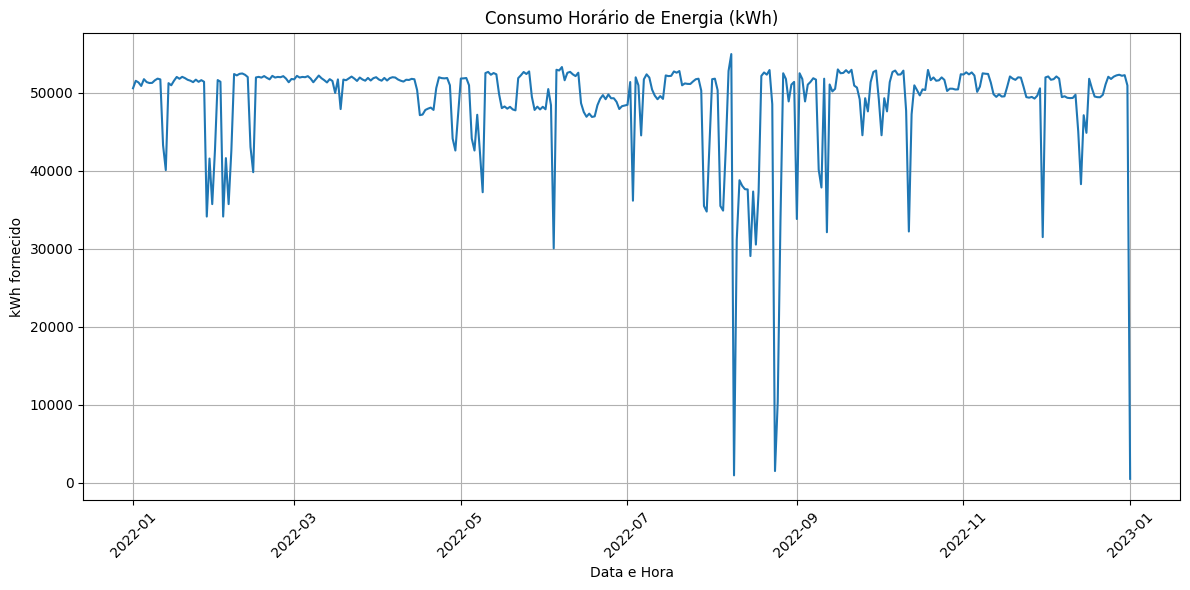

In [13]:
plot_hourly_data(Prata_I_daily)

In [16]:
# Salvar os resultados em um arquivo CSV ou JSON
results_df = pd.DataFrame(Prata_III_daily)
results_df.to_csv('PRATA_III_daily.csv', index=True)

In [1]:
import numpy as np
from scipy.signal import find_peaks

# Exemplo de série temporal (target)
target = np.array([1, 3, 7, 9, 8, 5, 2, 1, 4, 6, 8, 10, 9, 7, 3, 2, 1])

# Identificar picos (máximos locais)
peaks, _ = find_peaks(target, height=0)  # Picos
valleys, _ = find_peaks(-target)  # Vales (invertendo a série para encontrar os mínimos locais)

print("Picos nos índices:", peaks)
print("Vales nos índices:", valleys)


Picos nos índices: [ 3 11]
Vales nos índices: [7]


In [2]:
# Definir um vetor de pesos do mesmo tamanho que o target
weights = np.ones(len(target))  # Inicialmente, todos os pesos são 1

# Atribuir pesos maiores para picos e vales
weights[peaks] = 3  # Maior peso nos picos
weights[valleys] = 3  # Maior peso nos vales

print("Pesos ajustados:", weights)


Pesos ajustados: [1. 1. 1. 3. 1. 1. 1. 3. 1. 1. 1. 3. 1. 1. 1. 1. 1.]


In [3]:
# Função WMSE ajustada com pesos para picos e vales
def wmse(y_true, y_pred, weights):
    return np.mean(weights * (y_true - y_pred)**2)


WMSE com pesos em picos/vales: 0.10


In [ ]:
# Função WMAE ajustada com pesos para picos e vales
def wmae(y_true, y_pred, weights):
    wmae = np.sum(weights * np.abs(y_true - y_pred)) / np.sum(weights)

In [6]:
import tensorflow as tf

def identify_peaks_and_valleys(y_test):
    # Converte y_test em um tensor
    y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)
    # Inicializa pesos como um tensor de 1s do mesmo formato
    weights = tf.ones(tf.shape(y_test), dtype=tf.float32)

    # Obtenha o número de elementos
    num_elements = tf.shape(y_test)[0]

    # Obter os índices de picos e vales
    y_test_prev = tf.roll(y_test, shift=1, axis=0)
    y_test_next = tf.roll(y_test, shift=-1, axis=0)

    # Define picos e vales
    peaks = tf.where((y_test > y_test_prev) & (y_test > y_test_next))
    valleys = tf.where((y_test < y_test_prev) & (y_test < y_test_next))

    # Atualiza os pesos para picos e vales
    weights = tf.tensor_scatter_nd_update(weights, peaks, tf.fill(tf.shape(peaks)[:1], 3.0))
    weights = tf.tensor_scatter_nd_update(weights, valleys, tf.fill(tf.shape(valleys)[:1], 3.0))

    return weights

def wmse(y_test, y_pred):
    # Convertendo y_test e y_pred para float32
    y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)
    y_pred = tf.convert_to_tensor(y_pred, dtype=tf.float32)

    # Removendo dimensões desnecessárias
    y_test = tf.squeeze(y_test)
    y_pred = tf.squeeze(y_pred)

    # Obtendo pesos
    weights = identify_peaks_and_valleys(y_test)

    # Calculando WMSE
    wmse_value = tf.reduce_sum(weights * tf.square(y_test - y_pred)) / tf.reduce_sum(weights)

    return wmse_value

def wmae(y_test, y_pred):
    # Convertendo y_test e y_pred para float32
    y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)
    y_pred = tf.convert_to_tensor(y_pred, dtype=tf.float32)

    # Removendo dimensões desnecessárias
    y_test = tf.squeeze(y_test)
    y_pred = tf.squeeze(y_pred)

    # Obtendo pesos
    weights = identify_peaks_and_valleys(y_test)

    # Calculando WMAE
    wmae_value = tf.reduce_sum(weights * tf.abs(y_test - y_pred)) / tf.reduce_sum(weights)

    return wmae_value

def evaluate_metrics(y_test, y_pred):
    squared = wmse(y_test, y_pred)
    absolute = wmae(y_test, y_pred)
    return squared, absolute

# Dados de teste
y_test = [[1.2, 2, 3, 4, 5],
          [2, 4, 7, 8, 6],
          [3, 0, 9, 8, 7]]

y_pred = [[3, 2, 4, 5, 1],
          [2, 3, 6, 4, 5],
          [3, 0, 8, 9, 7]]

# Testando a função de avaliação
wmse_value, wmae_value = evaluate_metrics(y_test, y_pred)
print("WMSE:", wmse_value)
print("WMAE:", wmae_value.numpy())


WMSE: 2.688485
WMAE: 1.1030303
